<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Constructing an optimal portfolio

In [1]:
import pandas_datareader.data as web
import numpy as np, pandas as pd, scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
p = print

In [2]:
tickers = ['IBM', 'MSFT']
data = web.DataReader(tickers,'yahoo','01/01/2010','10/18/2019')['Adj Close']
returns = data.pct_change().dropna()
mean_return = returns.mean()
return_stdev = round(returns.std(),4)
cov_matrix = returns.cov()

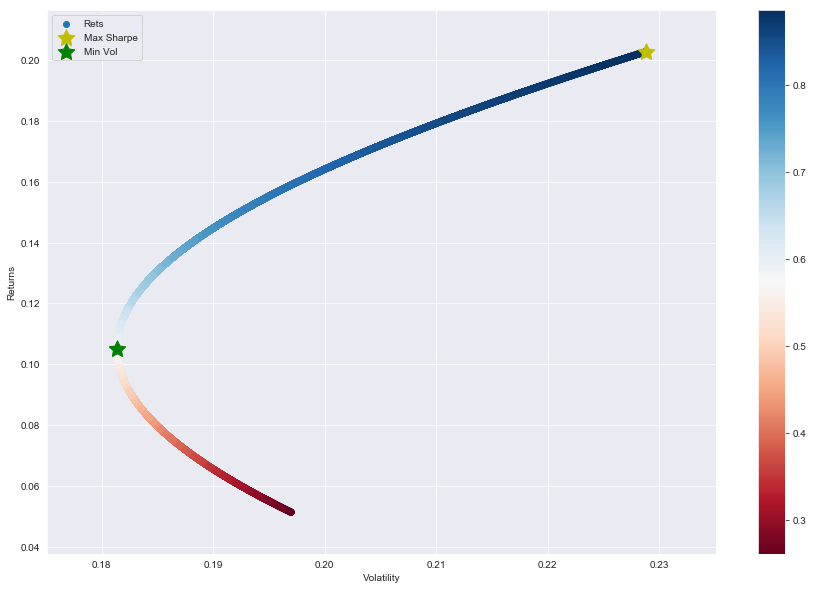

In [3]:
rf = 0.00003
num_portfolios = 25000

results = np.zeros((4+len(tickers)-1,num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(size=len(tickers))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights,mean_return) * 252
    portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(weights,cov_matrix))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    results[2,i] = (results[0,i] - rf) / results[1,i]
    
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

results_df = pd.DataFrame(results.T, columns=
                          ['Rets','Vol','Sharpe',tickers[0],tickers[1]])

max_sharpe_port = results_df.iloc[results_df['Sharpe'].idxmax()]
min_vol_port = results_df.iloc[results_df['Vol'].idxmin()]

plt.subplots(figsize=(15,10))
plt.scatter(results_df.Vol,results_df.Rets,c=results_df.Sharpe,cmap='RdBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar();
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='y',s=300, label='Max Sharpe')
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=300, label='Min Vol')
plt.legend();
plt.show()

In [4]:
max_sharpe_port

Rets      0.202718
Vol       0.228818
Sharpe    0.885806
IBM       0.000064
MSFT      0.999936
Name: 22098, dtype: float64

In [5]:
min_vol_port

Rets      0.105157
Vol       0.181367
Sharpe    0.579636
IBM       0.644686
MSFT      0.355314
Name: 3345, dtype: float64

In [6]:
tickers = ['AAPL','IBM', 'MSFT', 'WMT']
data = web.DataReader(tickers,'yahoo','01/01/2010','10/18/2019')['Adj Close']
returns = data.pct_change().dropna()
mean_return = returns.mean()
return_stdev = returns.std()
cov_matrix = returns.cov()

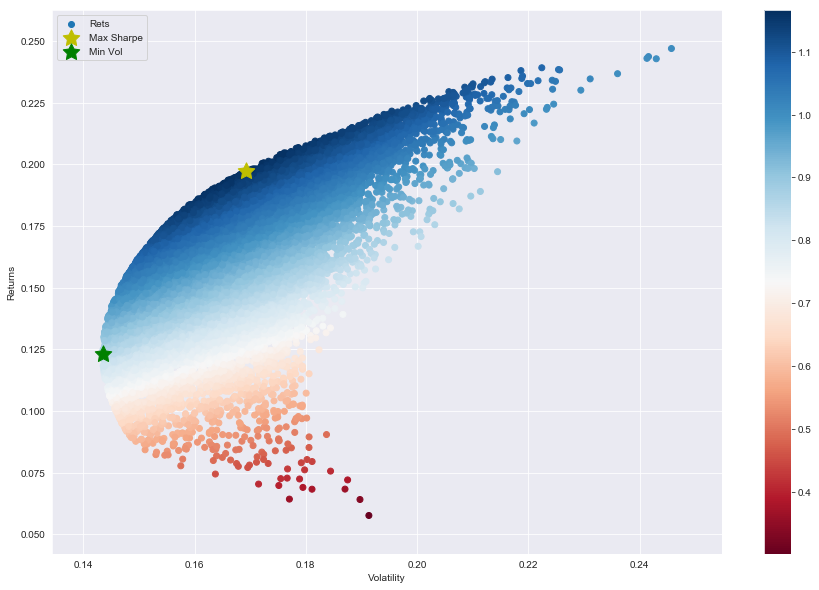

In [7]:
rf = 0.00003
num_portfolios = 25000

results = np.zeros((4+len(tickers)-1,num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(size=len(tickers))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights,mean_return) * 252
    portfolio_stdev = np.sqrt(np.dot(weights.T,np.dot(weights,cov_matrix))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    results[2,i] = (results[0,i] - rf) / results[1,i]
    
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

results_df = pd.DataFrame(results.T, columns=
                          ['Rets','Vol','Sharpe',tickers[0],tickers[1],tickers[2],tickers[3]])

max_sharpe_port = results_df.iloc[results_df['Sharpe'].idxmax()]
min_vol_port = results_df.iloc[results_df['Vol'].idxmin()]

plt.subplots(figsize=(15,10))
plt.scatter(results_df.Vol,results_df.Rets,c=results_df.Sharpe,cmap='RdBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar();
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='y',s=300, label='Max Sharpe')
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=300, label='Min Vol')
plt.legend();
plt.show()

In [8]:
max_sharpe_port

Rets      0.197319
Vol       0.169185
Sharpe    1.166112
AAPL      0.390080
IBM       0.001801
MSFT      0.289833
WMT       0.318286
Name: 8658, dtype: float64

In [9]:
min_vol_port

Rets      0.123037
Vol       0.143464
Sharpe    0.857413
AAPL      0.107875
IBM       0.285927
MSFT      0.092750
WMT       0.513448
Name: 972, dtype: float64